In [87]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [88]:
import matplotlib.pyplot as plt



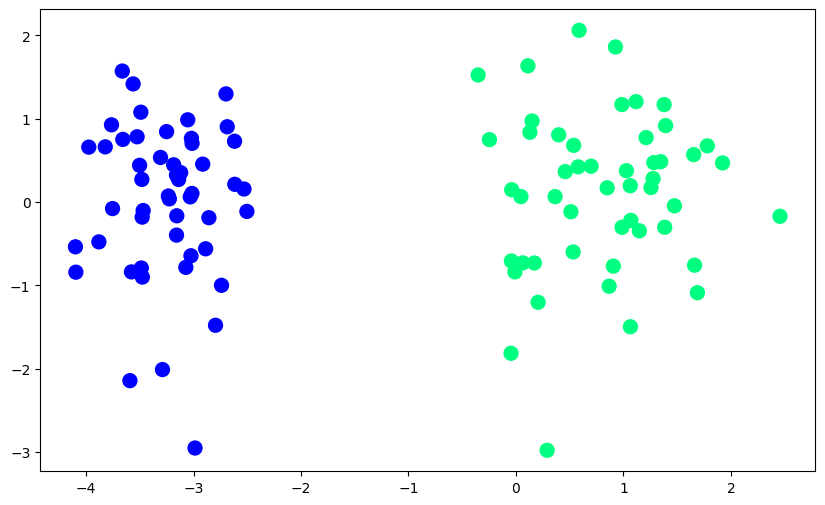

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [90]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty='none',solver='sag')#logistic regression by default apply penalti regularization we not apply by setting none
# solvers there are different solvers to solve
lor.fit(X,y)

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [91]:
print(lor.coef_)
print(lor.intercept_)

[[4.94498127 0.24075333]]
[5.90124024]


In [92]:
m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

In [93]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1


In [102]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1) #insert 1st column with value 1
    weights=np.ones(X.shape[1])
    lr=0.5
    #epochs value is 2500
    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0] #return coef_ and intercept_
        
        
    

In [103]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [104]:
coef_,intercept_=gd(X,y)

In [105]:
coef_

array([4.83926872, 0.21182255])

In [106]:
m2=-(coef_[0]/coef_[1])
b2=-(intercept_/coef_[1])

In [107]:
x_input1=np.linspace(-3,3,100)
y_input1=m2*x_input1+b2


### Logistic regression class work almost same as Logistic regression class in sklearn

(-3.0, 2.0)

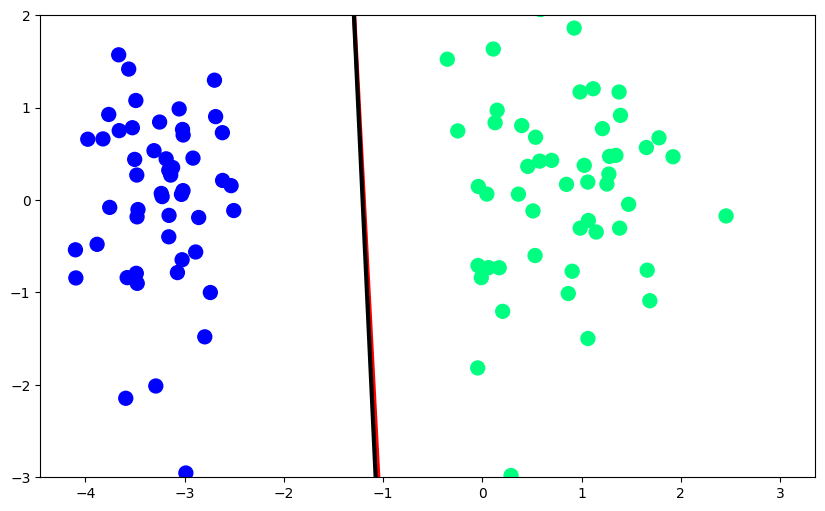

In [108]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)